In [4]:
import cmath
import matplotlib.pyplot as plt
import numpy as np
from typing import List

In [5]:
def recursive_fft(a: List[int]) -> List[complex]:
    n = len(a)
    if n == 1:
        return a
    wn = cmath.rect(1.0, 2 * np.pi / n)
    w = 1
    a0 = a[::2]
    a1 = a[1::2]
    y0 = recursive_fft(a0)
    y1 = recursive_fft(a1)
    y = [0] * n
    for k in range(n // 2):
        y[k] = y0[k] + w * y1[k]
        y[k + n // 2] = y0[k] - w * y1[k]
        w *= wn
    return y

In [6]:
def fact(n: int) -> int:
    if n <= 1:
        return 1
    ret = 1
    for i in range(2, n + 1):
        ret *= i
    return ret

In [45]:
def euler_sin(a: int, n: int) -> List[float]:
    ret = []
    for i in range(n):
        if i % 2 != 0:
            if ((i - 1) // 2) % 2 == 0:
                ret.append(1 / fact(i))
            else:
                ret.append(-(1 / fact(i)))
        else:
            ret.append(0.0)
    return ret

In [44]:
def euler_cos(a: int, n: int) -> List[float]:
    ret = []
    for i in range(n):
        if i % 2 == 0:
            if (i // 2) % 2 == 0:
                ret.append(1 / fact(i))
            else:
                ret.append(-(1 / fact(i)))
        else:
            ret.append(0.0)
    return ret

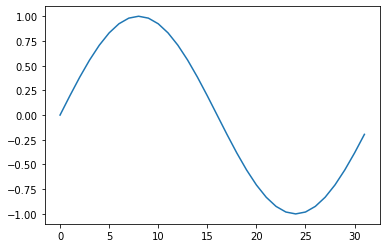

In [61]:
N = 32
n = np.arange(N)
f1 = 1
A1 = 1
f_np = A1 * np.sin(2 * np.pi * f1 * n / N)
plt.plot(f_np)

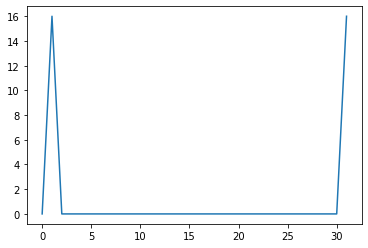

In [62]:
F_np = np.fft.fft(f_np)
plt.plot(np.abs(F_np))

In [63]:
F_np

array([-2.38357803e-16+0.00000000e+00j, -2.45393303e-15-1.60000000e+01j,
       -5.90478604e-16-9.18805124e-16j,  3.00060287e-16-6.22390159e-16j,
        1.35356204e-16-6.53242291e-16j, -3.71447813e-16-7.12120758e-16j,
        1.23631323e-16-4.81751308e-16j, -3.44509285e-16-1.11022302e-15j,
        1.22464680e-16+3.05311332e-16j,  4.32646832e-16-1.33226763e-15j,
        1.22036276e-15+3.95268809e-16j,  8.29530172e-16+5.97502205e-16j,
        3.31617761e-16+4.56980734e-16j, -3.71447813e-16+8.40837747e-17j,
       -2.63656757e-16+4.02304202e-16j, -1.22464680e-16+8.88178420e-16j,
        3.91979531e-17+0.00000000e+00j,  2.10602227e-16+0.00000000e+00j,
       -2.63656757e-16-4.02304202e-16j, -4.14918928e-16-9.47702299e-16j,
        3.31617761e-16-4.56980734e-16j,  5.70607663e-16-3.98102266e-16j,
        1.22036276e-15-3.95268809e-16j,  1.43184755e-15+1.11022302e-15j,
        1.22464680e-16-3.05311332e-16j,  4.32646832e-16+1.33226763e-15j,
        1.23631323e-16+4.81751308e-16j, -3.16351831

In [54]:
f = euler_sin(1, 32)
f

[0.0,
 1.0,
 0.0,
 -0.16666666666666666,
 0.0,
 0.008333333333333333,
 0.0,
 -0.0001984126984126984,
 0.0,
 2.7557319223985893e-06,
 0.0,
 -2.505210838544172e-08,
 0.0,
 1.6059043836821613e-10,
 0.0,
 -7.647163731819816e-13,
 0.0,
 2.8114572543455206e-15,
 0.0,
 -8.22063524662433e-18,
 0.0,
 1.9572941063391263e-20,
 0.0,
 -3.868170170630684e-23,
 0.0,
 6.446950284384474e-26,
 0.0,
 -9.183689863795546e-29,
 0.0,
 1.1309962886447716e-31,
 0.0,
 -1.216125041553518e-34]

In [55]:
F = recursive_fft(f)
F

[0.8414709848078966,
 (0.8467975313995431+0.1092322784016431j),
 (0.857090704961908+0.2363255455557896j),
 (0.8559231939548145+0.3938944503942579j),
 (0.8189270221070483+0.5835053242126248j),
 (0.7204929387121821+0.7906726713781292j),
 (0.5444372019402796+0.984285211048856j),
 (0.29481159824337233+1.1240314577902637j),
 (6.523677118751579e-17+1.1752011936438014j),
 (-0.2948115982433723+1.1240314577902637j),
 (-0.5444372019402793+0.984285211048856j),
 (-0.7204929387121817+0.7906726713781291j),
 (-0.818927022107048+0.5835053242126247j),
 (-0.8559231939548141+0.39389445039425786j),
 (-0.8570907049619075+0.23632554555578955j),
 (-0.8467975313995426+0.1092322784016431j),
 -0.8414709848078966,
 (-0.8467975313995431-0.1092322784016431j),
 (-0.857090704961908-0.2363255455557896j),
 (-0.8559231939548145-0.3938944503942579j),
 (-0.8189270221070483-0.5835053242126248j),
 (-0.7204929387121821-0.7906726713781292j),
 (-0.5444372019402796-0.984285211048856j),
 (-0.29481159824337233-1.1240314577902637

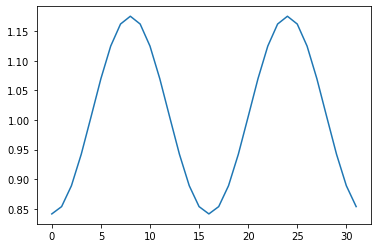

In [56]:
plt.plot(np.abs(np.array(F)))

In [67]:
def calc_euler_sin(f: List[float], x: List[complex]) -> List[complex]:
    def _calc(x: complex):
        ret = 0
        for i in range(len(f)):
            ret += f[i] * (x ** i)
        return ret
    return list(map(_calc, x))

In [101]:
N = 32
res = calc_euler_sin(euler_sin(1, N), [cmath.rect(1.0, 2 * np.pi * i / N) for i in range(N)])

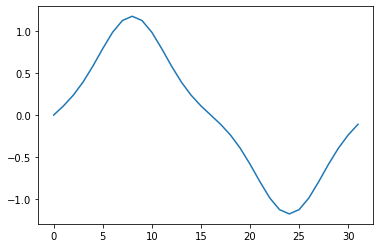

In [102]:
plt.plot(list(range(len(res))), list(map(lambda x: x.imag, res)))

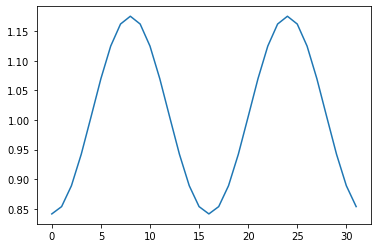

In [85]:
plt.plot(list(range(len(res))), list(map(abs, res)))

In [103]:
N = 64
res = calc_euler_sin(euler_cos(1, N), [cmath.rect(1.0, 2 * np.pi * i / N) for i in range(N)])

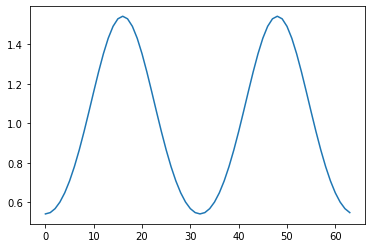

In [104]:
plt.plot(list(range(N)), list(map(lambda x: x.real, res)))

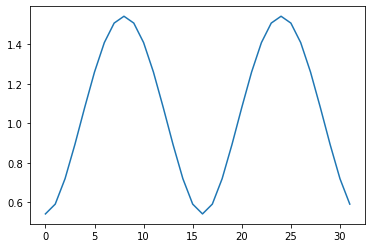

In [89]:
plt.plot(list(range(N)), list(map(abs, res)))

In [105]:
def rev(k: int, n: int) -> int:
    return int(format(k, f'0{n}b')[::-1], 2)


def bit_reverse_copy(a: List[int]) -> List[int]:
    n = len(a)
    A = [0] * n
    for i in range(n):
        A[rev(i, int(cmath.log(n)))] = a[i]


def iterative_fft(a: List[int]) -> List[float]:
    A = bit_reverse_copy(a)
    n = len(a)
    for s in range(1, int(cmath.log(n))):
        m = 2 ** s
        wm = cmath.rect(1.0, 2 * cmath.pi / m)
        for k in range(0, n, m):
            w = 1
            for j in range(m // 2):
                t = w * A[k + j + m // 2]
                u = A[k + j]
                A[k + j] = u + t
                A[k + j + m // 2] = u - t
                w *= wm
    return A